In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from tensorflow import keras
import keras as ks
from keras import layers
from keras import models

In [38]:
import os, shutil

In [39]:
images_dir = r'C:\Users\sraeisi\Documents\Datasets\Physics\Galaxies\Kaggle\images_training_rev1'
labels = r'training_solutions_rev1.csv'
test_img_dir=r'images_test_rev1'

In [40]:
batch_size = 128
n_w = 200
n_h = 200
n_c = 3
n_classes = 27#3
stp_epch =  int(61578/ batch_size)+1
stp_epch

482

# Question 1 estimator

In [41]:
df = pd.read_csv('Y_1.csv')
df['GalaxyID'] = df['GalaxyID'].astype(str)+'.jpg'
df['label'] = np.argmax(df.drop(['GalaxyID'], axis=1).values, axis=1 ).astype(str)
df.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,label
0,100008.jpg,0.383147,0.616853,0.000000,1
1,100023.jpg,0.327001,0.663777,0.009222,1
2,100053.jpg,0.765717,0.177352,0.056931,0
3,100078.jpg,0.693377,0.238564,0.068059,0
4,100090.jpg,0.933839,0.000000,0.066161,0


In [42]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255.,validation_split=0.25)
test_datagen = ImageDataGenerator(rescale=1./255. ,validation_split=0.25)

train_c_generator = train_datagen.flow_from_dataframe( dataframe=df,
                                                   directory=images_dir,
                                                   x_col = 'GalaxyID', 
                                                   y_col = 'label', 
                                                   class_mode='categorical',
                                                   target_size=(n_w, n_h),   
                                                   batch_size=batch_size,
                                                   shuffle=True, 
                                                   subset='training')
######################################################################################
validation_c_generator = train_datagen.flow_from_dataframe( dataframe=df,
                                                   directory=images_dir,
                                                   x_col = 'GalaxyID', 
                                                   y_col = 'label', 
                                                   class_mode='categorical',
                                                   target_size=(n_w, n_h),   
                                                   batch_size=batch_size,
                                                   shuffle=True, 
                                                   subset='validation')

######################################################################################

train_generator = train_datagen.flow_from_dataframe( dataframe=df,
                                                   directory=images_dir,
                                                   x_col = 'GalaxyID', 
                                                   y_col = ['Class1.1','Class1.2','Class1.3'], 
                                                   class_mode='other', 
                                                   target_size=(n_w, n_h), 
                                                   batch_size=batch_size,
                                                   shuffle=True, 
                                                   subset='training')

validation_generator = train_datagen.flow_from_dataframe( dataframe=df,
                                                   directory=images_dir,
                                                   x_col = 'GalaxyID', 
                                                   y_col = ['Class1.1','Class1.2','Class1.3'], 
                                                   class_mode='other', 
                                                   target_size=(n_w, n_h), 
                                                   batch_size=batch_size, 
                                                   shuffle=True, 
                                                   subset='validation')


Found 46184 images belonging to 3 classes.
Found 15394 images belonging to 3 classes.
Found 46184 images.
Found 15394 images.


In [43]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (128, 200, 200, 3)
labels batch shape: (128, 3)


In [44]:
stp_epch =  int(61578/ batch_size)+1

In [45]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(n_w , n_h, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((3, 3)))
# model.add(layers.Conv2D(64, (5, 5), activation='relu'))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 128)       73856     
__________

In [30]:
model.compile(loss=ks.losses.mean_squared_error, 
             optimizer=ks.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True), 
             metrics=['acc'])

In [24]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1985596717678863155
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4947404390
locality {
  bus_id: 1
  links {
  }
}
incarnation: 564968549418463548
physical_device_desc: "device: 0, name: GeForce GTX 1060, pci bus id: 0000:02:00.0, compute capability: 6.1"
]


In [24]:
%%time
history = model.fit_generator(train_generator, 
                             steps_per_epoch=stp_epch, 
                             epochs=10)

Epoch 1/10
241/241 [==============================] - 97s 403ms/step - loss: 0.0430 - acc: 0.7129
Epoch 2/10
241/241 [==============================] - 136s 564ms/step - loss: 0.0385 - acc: 0.7473
Epoch 3/10
241/241 [==============================] - 175s 725ms/step - loss: 0.0354 - acc: 0.7674
Epoch 4/10
241/241 [==============================] - 152s 629ms/step - loss: 0.0332 - acc: 0.7775
Epoch 5/10
241/241 [==============================] - 144s 598ms/step - loss: 0.0315 - acc: 0.7872
Epoch 6/10
241/241 [==============================] - 174s 724ms/step - loss: 0.0299 - acc: 0.7922
Epoch 7/10
241/241 [==============================] - 154s 641ms/step - loss: 0.0288 - acc: 0.7988
Epoch 8/10
241/241 [==============================] - 169s 701ms/step - loss: 0.0284 - acc: 0.7995
Epoch 9/10
241/241 [==============================] - 190s 787ms/step - loss: 0.0278 - acc: 0.8020
Epoch 10/10
241/241 [==============================] - 158s 656ms/step - loss: 0.0270 - acc: 0.8049


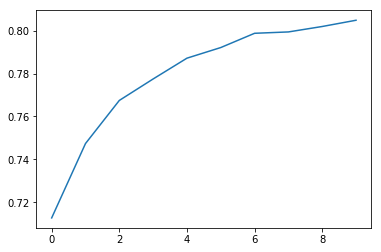

In [25]:
plt.plot(history.history['acc'])

# Pretrained models

## Pretrained VGG16 + classifier at the end

In [46]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(n_w, n_h, 3))

In [47]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0         
__________

In [48]:
def extract_features(network, generator, sample_count):
    features = np.zeros(shape=(sample_count, 6, 6, 512))
    labels = np.zeros(shape=(sample_count, n_classes))

    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = network.predict(inputs_batch)
#         print(labels_batch.shape)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
#         print(i)
        if i * batch_size >= sample_count:
            break
    return features, labels

In [15]:
%%time 
train_features, train_labels = extract_features(conv_base, train_generator, 100*batch_size)
validation_features, validation_labels = extract_features(conv_base, validation_generator, 10*batch_size)

Wall time: 3min


In [32]:
train_features = np.reshape(train_features, (100*batch_size, 3 * 3 * 512))
validation_features = np.reshape(validation_features, (10*batch_size, 3 * 3 * 512))

In [25]:
'''
Now let's make our new model.
'''
pre_trained_model = ks.models.Sequential()

# pre_trained_model.add(conv_base)

# pre_trained_model.add(ks.layers.Flatten())

pre_trained_model.add(ks.layers.Dense(256, activation='relu', input_dim=3 * 3 * 512))
# pre_trained_model.add(ks.layers.Dropout(0.5))

pre_trained_model.add(ks.layers.Dense(3, activation='softmax'))

pre_trained_model.compile(loss=ks.losses.mean_squared_error, 
             optimizer=ks.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True), 
             metrics=['acc'])

pre_trained_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               1179904   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 771       
Total params: 1,180,675
Trainable params: 1,180,675
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = pre_trained_model.fit(train_features, train_labels, epochs=100, batch_size=batch_size, 
                    validation_data= (validation_features, validation_labels)
                   )

Train on 25600 samples, validate on 2560 samples
Epoch 1/100
25600/25600 [==============================] - 2s 74us/step - loss: 0.0320 - acc: 0.7811 - val_loss: 0.0300 - val_acc: 0.7855
Epoch 2/100
25600/25600 [==============================] - 2s 62us/step - loss: 0.0317 - acc: 0.7822 - val_loss: 0.0295 - val_acc: 0.7805
Epoch 3/100
25600/25600 [==============================] - 2s 61us/step - loss: 0.0314 - acc: 0.7812 - val_loss: 0.0295 - val_acc: 0.7848
Epoch 4/100
25600/25600 [==============================] - 2s 63us/step - loss: 0.0311 - acc: 0.7854 - val_loss: 0.0295 - val_acc: 0.7891
Epoch 5/100
25600/25600 [==============================] - 2s 62us/step - loss: 0.0308 - acc: 0.7863 - val_loss: 0.0287 - val_acc: 0.7848
Epoch 6/100
25600/25600 [==============================] - 2s 63us/step - loss: 0.0306 - acc: 0.7866 - val_loss: 0.0286 - val_acc: 0.7914
Epoch 7/100
25600/25600 [==============================] - 2s 64us/step - loss: 0.0306 - acc: 0.7871 - val_loss: 0.0286 - v

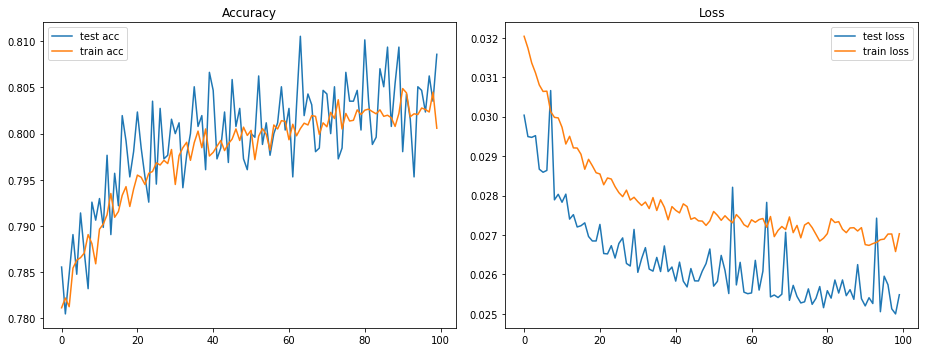

In [37]:
fig = plt.figure(figsize=(13, 5))
ax  = fig.add_subplot(1,2,1, title='Accuracy')
plt.plot(history.history['val_acc'], label = 'test acc')
plt.plot(history.history['acc'], label = 'train acc')
plt.legend(loc=0)

ax  = fig.add_subplot(1,2,2, title='Loss')
plt.plot(history.history['val_loss'], label = 'test loss')
plt.plot(history.history['loss'], label = 'train loss')
plt.legend(loc=0)

plt.tight_layout()
plt.show()


## Freezed pretrained VGG16 + trainable estimator at the end

In [ ]:
conv_base.trainable = False

In [42]:
'''
Now let's make our new model.
'''
pre_trained_model = ks.models.Sequential()

pre_trained_model.add(conv_base)

pre_trained_model.add(ks.layers.Flatten())

pre_trained_model.add(ks.layers.Dense(256, activation='relu' ))
pre_trained_model.add(ks.layers.Dropout(0.5))

pre_trained_model.add(ks.layers.Dense(3, activation='softmax'))

pre_trained_model.compile(loss=ks.losses.mean_squared_error, 
             optimizer=ks.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True), 
             metrics=['acc'])

pre_trained_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               1179904   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 771       
Total params: 15,895,363
Trainable params: 1,180,675
Non-trainable params: 14,714,688
_________________________________________________________________


In [43]:
# conv_base.trainable = False
pre_trained_model.trainable_weights

[<tf.Variable 'dense_7/kernel:0' shape=(4608, 256) dtype=float32_ref>,
 <tf.Variable 'dense_7/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'dense_8/kernel:0' shape=(256, 3) dtype=float32_ref>,
 <tf.Variable 'dense_8/bias:0' shape=(3,) dtype=float32_ref>]

Epoch 1/2
241/241 [==============================] - 233s 967ms/step - loss: 0.0441 - acc: 0.7052 - val_loss: 0.0346 - val_acc: 0.7688
Epoch 2/2
241/241 [==============================] - 253s 1s/step - loss: 0.0355 - acc: 0.7643 - val_loss: 0.0316 - val_acc: 0.7806


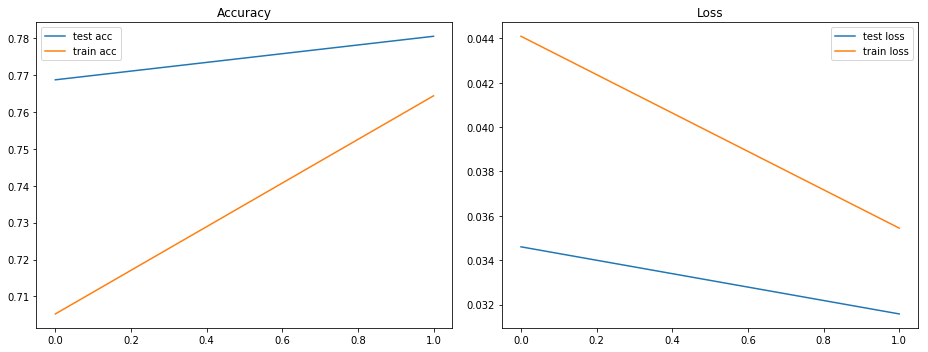

Wall time: 8min 6s


In [44]:
%%time
############### Training the model

history = pre_trained_model.fit_generator(train_generator, epochs=2, 
                                steps_per_epoch=stp_epch, 
                                validation_data= validation_generator, 
                                validation_steps= stp_epch
                               )

##############Plotting the result
fig = plt.figure(figsize=(13, 5))
ax  = fig.add_subplot(1,2,1, title='Accuracy')
plt.plot(history.history['val_acc'], label = 'test acc')
plt.plot(history.history['acc'], label = 'train acc')
plt.legend(loc=0)

ax  = fig.add_subplot(1,2,2, title='Loss')
plt.plot(history.history['val_loss'], label = 'test loss')
plt.plot(history.history['loss'], label = 'train loss')
plt.legend(loc=0)

plt.tight_layout()
plt.show()


## Partially freezed pretrained VGG16 + trainable estimator at the end

In [54]:
conv_base.trainble = True

# We can freeze all bu the last two layers. 
for layer in conv_base.layers[:-2]:
    layer.trainable = False

## We can check which layers are traible. 
i=0    
for layer in conv_base.layers:
    i+=1
    print('Layer {} is trainable: {}'.format(i,layer.trainable)  )    

Layer 1 is trainable: False
Layer 2 is trainable: False
Layer 3 is trainable: False
Layer 4 is trainable: False
Layer 5 is trainable: False
Layer 6 is trainable: False
Layer 7 is trainable: False
Layer 8 is trainable: False
Layer 9 is trainable: False
Layer 10 is trainable: False
Layer 11 is trainable: False
Layer 12 is trainable: False
Layer 13 is trainable: False
Layer 14 is trainable: False
Layer 15 is trainable: False
Layer 16 is trainable: False
Layer 17 is trainable: False
Layer 18 is trainable: True
Layer 19 is trainable: True


In [56]:

pre_trained_model = ks.models.Sequential()

pre_trained_model.add(conv_base)

pre_trained_model.add(ks.layers.Flatten())

pre_trained_model.add(ks.layers.Dense(256, activation='relu' ))
pre_trained_model.add(ks.layers.Dropout(0.5))

pre_trained_model.add(ks.layers.Dense(3, activation='softmax'))

pre_trained_model.compile(loss=ks.losses.mean_squared_error, 
             optimizer=ks.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True), 
             metrics=['acc'])



Epoch 1/2
241/241 [==============================] - 217s 899ms/step - loss: 0.0443 - acc: 0.7015 - val_loss: 0.0345 - val_acc: 0.7721
Epoch 2/2
241/241 [==============================] - 351s 1s/step - loss: 0.0357 - acc: 0.7635 - val_loss: 0.0321 - val_acc: 0.7731


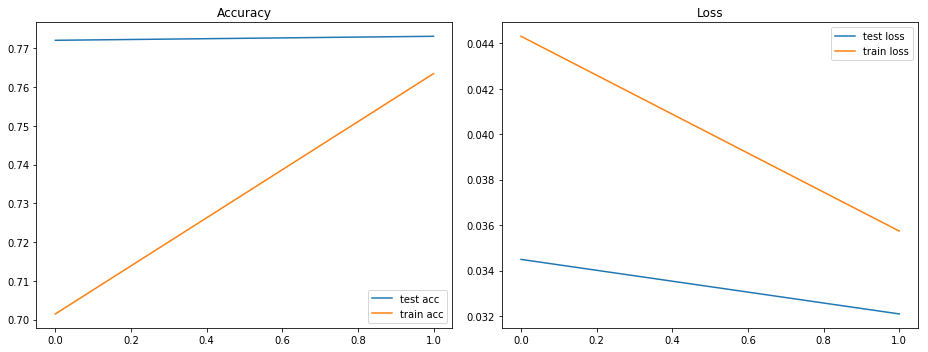

Wall time: 9min 28s


In [57]:
%%time

## Reset the model
# pre_trained_model.reset_states


############### Training the model

history = pre_trained_model.fit_generator(train_generator, epochs=2, 
                                steps_per_epoch=stp_epch, 
                                validation_data= validation_generator, 
                                validation_steps= stp_epch
                               )

##############Plotting the result
fig = plt.figure(figsize=(13, 5))
ax  = fig.add_subplot(1,2,1, title='Accuracy')
plt.plot(history.history['val_acc'], label = 'test acc')
plt.plot(history.history['acc'], label = 'train acc')
plt.legend(loc=0)

ax  = fig.add_subplot(1,2,2, title='Loss')
plt.plot(history.history['val_loss'], label = 'test loss')
plt.plot(history.history['loss'], label = 'train loss')
plt.legend(loc=0)

plt.tight_layout()
plt.show()


# Full estimation of the labels

In [6]:
df = pd.read_csv(labels)
df['GalaxyID'] = df['GalaxyID'].astype(str)+'.jpg'
df.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008.jpg,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023.jpg,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053.jpg,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078.jpg,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090.jpg,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [7]:
label_cols = df.columns[1:]
n_classes = len(label_cols)

In [32]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255.,validation_split=0.25)



######################################################################################

train_generator = train_datagen.flow_from_dataframe( dataframe=df,
                                                   directory=images_dir,
                                                   x_col = 'GalaxyID', 
                                                   y_col = label_cols, 
                                                   class_mode='other', 
                                                   target_size=(n_w, n_h), 
                                                   batch_size=batch_size,
                                                   shuffle=True, 
                                                   subset='training')

validation_generator = train_datagen.flow_from_dataframe( dataframe=df,
                                                   directory=images_dir,
                                                   x_col = 'GalaxyID', 
                                                   y_col = label_cols, 
                                                   class_mode='other', 
                                                   target_size=(n_w, n_h), 
                                                   batch_size=batch_size, 
                                                   shuffle=True, 
                                                   subset='validation')


Found 46184 images.
Found 15394 images.


In [8]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(n_w, n_h, 3))
conv_base.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
bloc

In [25]:
out_lay = conv_base.layers[-1]
con_base_out_d = out_lay.output_shape[1]

In [25]:


def extract_features(network, generator, sample_count):
    features = np.zeros(shape=(sample_count, con_base_out_d, con_base_out_d, 512))
    labels = np.zeros(shape=(sample_count, n_classes))

    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = network.predict(inputs_batch)
#         print(features_batch.shape)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
#         print(i)
        if i * batch_size >= sample_count:
            break
    return features, labels

In [32]:
%%time 
train_features, train_labels = extract_features(conv_base, train_generator, 150*batch_size)
validation_features, validation_labels = extract_features(conv_base, validation_generator, 20*batch_size)

Wall time: 9min 29s


In [36]:
train_features = np.reshape(train_features, (150*batch_size, con_base_out_d * con_base_out_d * 512))
validation_features = np.reshape(validation_features, (20*batch_size, con_base_out_d * con_base_out_d * 512))

In [39]:
'''
Now let's make our new model.
'''
pre_trained_model = ks.models.Sequential()

# pre_trained_model.add(conv_base)

# pre_trained_model.add(ks.layers.Flatten())

pre_trained_model.add(ks.layers.Dense(1024, activation='relu', input_dim=con_base_out_d * con_base_out_d * 512))
pre_trained_model.add(ks.layers.Dropout(0.15))

pre_trained_model.add(ks.layers.Dense(256, activation='relu'))
pre_trained_model.add(ks.layers.Dropout(0.15))


pre_trained_model.add(ks.layers.Dense(n_classes, activation='sigmoid'))

pre_trained_model.compile(loss=ks.losses.mean_squared_error, 
             optimizer=ks.optimizers.SGD(lr=0.00001, decay=1e-6, momentum=0.9, nesterov=True), 
             metrics=['acc', 'MSE'])
pre_trained_model.optimizer = ks.optimizers.RMSprop(lr=1e-6)
pre_trained_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              18875392  
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               262400    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 37)                9509      
Total params: 19,147,301
Trainable params: 19,147,301
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.cast instead.
Train on 38400 samples, validate on 5120 samples
Epoch 1/100
38400/38400 [==============================] - 15s 386us/step - loss: 0.1285 - acc: 0.3278 - mean_squared_error: 0.1285 - val_loss: 0.0784 - val_acc: 0.6033 - val_mean_squared_error: 0.0784
Epoch 2/100
38400/38400 [==============================] - 13s 351us/step - loss: 0.0673 - acc: 0.5828 - mean_squared_error: 0.0673 - val_loss: 0.0419 - val_acc: 0.6033 - val_mean_squared_error: 0.0419
Epoch 3/100
38400/38400 [==============================] - 16s 409us/step - loss: 0.0437 - acc: 0.5799 - mean_squared_error: 0.0437 - val_loss: 0.0302 - val_acc: 0.6033 - val_mean_squared_error: 0.0302
Epoch 4/100
38400/38400 [==============================] - 16s 414us/step - loss: 0.0361 - acc: 0.5705 - mean_squared_error: 0.0361 - val_loss: 0.0275 - val_acc: 0.6033 - val_mean_squared_error: 0.0275
Epoch 5/100
38400/38400 [==============================] - 17s 432us/step - loss: 0.0339 - acc:

Epoch 40/100
38400/38400 [==============================] - 14s 368us/step - loss: 0.0238 - acc: 0.5974 - mean_squared_error: 0.0238 - val_loss: 0.0198 - val_acc: 0.6395 - val_mean_squared_error: 0.0198
Epoch 41/100
38400/38400 [==============================] - 15s 381us/step - loss: 0.0236 - acc: 0.5955 - mean_squared_error: 0.0236 - val_loss: 0.0197 - val_acc: 0.6406 - val_mean_squared_error: 0.0197
Epoch 42/100
38400/38400 [==============================] - 15s 382us/step - loss: 0.0235 - acc: 0.5972 - mean_squared_error: 0.0235 - val_loss: 0.0196 - val_acc: 0.6416 - val_mean_squared_error: 0.0196
Epoch 43/100
38400/38400 [==============================] - 14s 373us/step - loss: 0.0233 - acc: 0.5991 - mean_squared_error: 0.0233 - val_loss: 0.0195 - val_acc: 0.6422 - val_mean_squared_error: 0.0195
Epoch 44/100
38400/38400 [==============================] - 16s 427us/step - loss: 0.0232 - acc: 0.5993 - mean_squared_error: 0.0232 - val_loss: 0.0194 - val_acc: 0.6443 - val_mean_squared

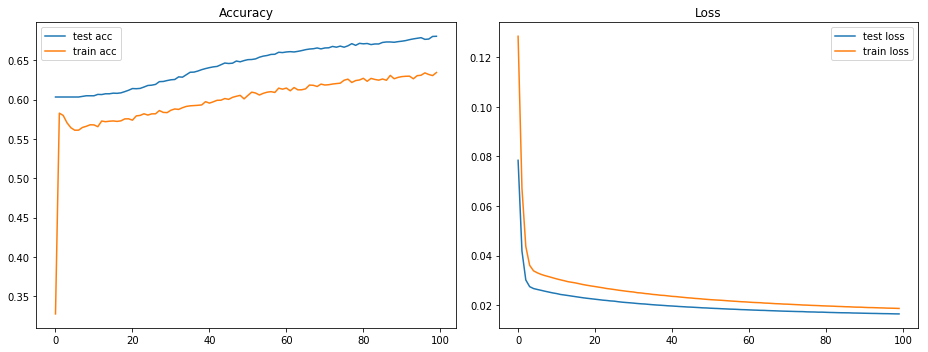

In [40]:
history = pre_trained_model.fit(train_features, train_labels, epochs=100, batch_size=batch_size, 
                    validation_data= (validation_features, validation_labels)
                   )

##############Plotting the result
fig = plt.figure(figsize=(13, 5))
ax  = fig.add_subplot(1,2,1, title='Accuracy')
plt.plot(history.history['val_acc'], label = 'test acc')
plt.plot(history.history['acc'], label = 'train acc')
plt.legend(loc=0)

ax  = fig.add_subplot(1,2,2, title='Loss')
plt.plot(history.history['val_loss'], label = 'test loss')
plt.plot(history.history['loss'], label = 'train loss')
plt.legend(loc=0)

plt.tight_layout()
plt.show()

In [41]:
pre_trained_model.save('150B_200pxl_fc1024_fc256.model')

In [44]:
pre_trained_model.save('150B_200pxl_fc1024_fc256.h5')
pre_trained_model.save_weights('150B_200pxl_fc1024_fc256_weights.h5')

In [42]:
np.sqrt(.0187)

0.13674794331177342

In [45]:
import pickle

with open('150B_200pxl_fc1024_fc256_hist', 'wb') as f:
        pickle.dump(history.history, f)

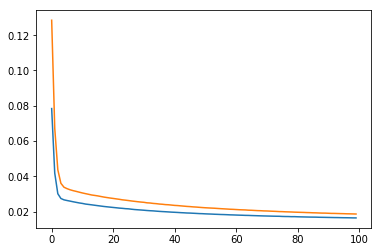

In [53]:
with open('150B_200pxl_fc1024_fc256_hist', 'rb') as f:
        hist = pickle.load(f)

plt.plot(hist['val_mean_squared_error'])
plt.plot(hist['mean_squared_error'])

# Tuning the model
## Adding more trainable layers

In [9]:
my_model = ks.models.load_model('150B_200pxl_fc1024_fc256.h5')


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [10]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(n_w, n_h, 3))
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0         
__________

In [11]:
label_cols = df.columns[1:]
n_classes = len(label_cols)

In [27]:
conv_base.trainble = True

# We can freeze all but the last two layers. 
for layer in conv_base.layers[:-1]:
    layer.trainable = False

## We can check which layers are traible. 
i=0    
for layer in conv_base.layers:
    i+=1
    print('Layer {} is trainable: {}'.format(i,layer.trainable)  )    

Layer 1 is trainable: False
Layer 2 is trainable: False
Layer 3 is trainable: False
Layer 4 is trainable: False
Layer 5 is trainable: False
Layer 6 is trainable: False
Layer 7 is trainable: False
Layer 8 is trainable: False
Layer 9 is trainable: False
Layer 10 is trainable: False
Layer 11 is trainable: False
Layer 12 is trainable: False
Layer 13 is trainable: False
Layer 14 is trainable: False
Layer 15 is trainable: False
Layer 16 is trainable: False
Layer 17 is trainable: False
Layer 18 is trainable: False
Layer 19 is trainable: True


In [28]:
ext_model = ks.models.Sequential()
ext_model.add(conv_base)
ext_model.add(ks.layers.Flatten())
ext_model.add(my_model)
ext_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 37)                19147301  
Total params: 33,861,989
Trainable params: 19,147,301
Non-trainable params: 14,714,688
_________________________________________________________________


In [16]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (256, 200, 200, 3)
labels batch shape: (256, 37)


In [23]:
predicted_y = ext_model.predict(data_batch)
from sklearn.metrics import mean_squared_error
mean_squared_error(predicted_y, labels_batch)

0.017320873420552326

In [34]:
ext_model.compile(loss=ks.losses.mean_squared_error, 
             optimizer=ks.optimizers.SGD(lr=0.00001, decay=1e-6, momentum=0.9, nesterov=True), 
             metrics=['acc' , 'MSE'])


Epoch 1/2
482/482 [==============================] - 1177s 2s/step - loss: 0.0187 - acc: 0.6337 - mean_squared_error: 0.0187 - val_loss: 0.0165 - val_acc: 0.6805 - val_mean_squared_error: 0.0165
Epoch 2/2
482/482 [==============================] - 1651s 3s/step - loss: 0.0187 - acc: 0.6337 - mean_squared_error: 0.0187 - val_loss: 0.0165 - val_acc: 0.6805 - val_mean_squared_error: 0.0165


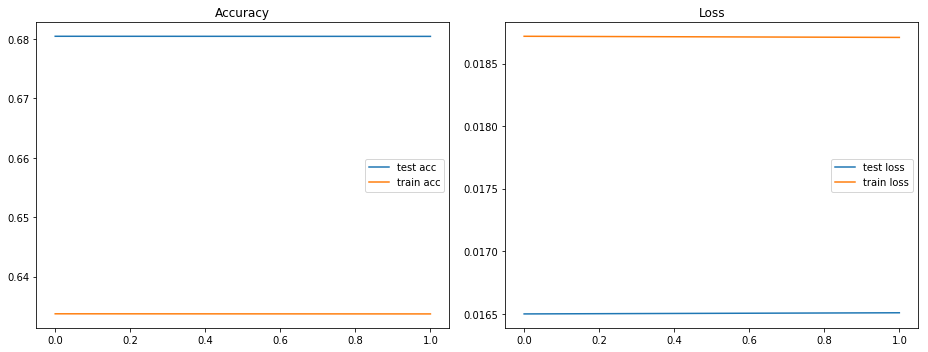

Wall time: 47min 9s


In [35]:
%%time
############### Training the model

history = ext_model.fit_generator(train_generator, epochs=2, 
                                steps_per_epoch=stp_epch, 
                                validation_data= validation_generator, 
                                validation_steps= stp_epch
                               )

##############Plotting the result
fig = plt.figure(figsize=(13, 5))
ax  = fig.add_subplot(1,2,1, title='Accuracy')
plt.plot(history.history['val_acc'], label = 'test acc')
plt.plot(history.history['acc'], label = 'train acc')
plt.legend(loc=0)

ax  = fig.add_subplot(1,2,2, title='Loss')
plt.plot(history.history['val_loss'], label = 'test loss')
plt.plot(history.history['loss'], label = 'train loss')
plt.legend(loc=0)

plt.tight_layout()
plt.show()
